<a href="https://colab.research.google.com/github/Berryhendricks/10Alytics-Projects/blob/main/EDA_Assignment_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Internship Assignment: EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing my dataset

In [2]:
ds = pd.read_csv('ds_salaries.csv')

In [3]:
# printing the first 5 rows
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# printing the last 5 rows
ds.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
# dataset information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# Check for missiing values
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Univariate Analysis: Categorical columns

In [7]:
# Experience Level (visualizing using frequency table)
ds.groupby(['experience_level']).count()

,Unnamed: 0,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
experience_level,,,,,,,,,,,
EN,88,88,88,88,88,88,88,88,88,88,88
EX,26,26,26,26,26,26,26,26,26,26,26
MI,213,213,213,213,213,213,213,213,213,213,213
SE,280,280,280,280,280,280,280,280,280,280,280


In [8]:
freq_table = ds.groupby(['experience_level']).size().reset_index(name='Count').rename(columns={'experience_level':'experience_level'})
freq_table

,experience_level,Count
0,EN,88
1,EX,26
2,MI,213
3,SE,280


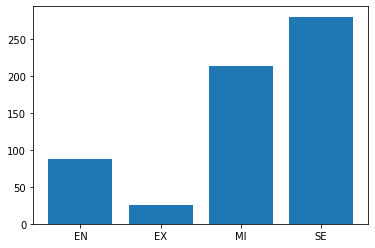

In [9]:
# Experience Level (visualizing using bar chart)
plt.bar(freq_table['experience_level'], freq_table['Count'])
plt.show()

In [10]:
# job title (visualizing using frequency table)
j_t = ds.groupby(['job_title']).size().reset_index(name='Count').rename(columns={'job_title':'job_title'})
j_t

,job_title,Count
0,3D Computer Vision Researcher,1
1,AI Scientist,7
2,Analytics Engineer,4
3,Applied Data Scientist,5
4,Applied Machine Learning Scientist,4
5,BI Data Analyst,6
6,Big Data Architect,1
7,Big Data Engineer,8
8,Business Data Analyst,5
9,Cloud Data Engineer,2


In [11]:
j_t.count()

job_title    50
Count        50
dtype: int64

In [12]:
# employment type (visualizing using frequency table)
e_t = ds.groupby(['employment_type']).size().reset_index(name='Count').rename(columns={'employment_type':'employment_type'})
e_t

,employment_type,Count
0,CT,5
1,FL,4
2,FT,588
3,PT,10


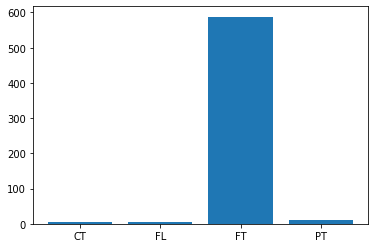

In [13]:
# employment type (visualizing using bar chart)
plt.bar(e_t['employment_type'], e_t['Count'])
plt.show()

In [14]:
# employment residence (visualizing using frequency table)
e_r = ds.groupby(['employee_residence']).size().reset_index(name='Count').rename(columns={'employee_residence':'employee_residence'})
e_r

,employee_residence,Count
0,AE,3
1,AR,1
2,AT,3
3,AU,3
4,BE,2
5,BG,1
6,BO,1
7,BR,6
8,CA,29
9,CH,1


In [15]:
e_r.count()

employee_residence    57
Count                 57
dtype: int64

In [16]:
# company location (visualizing using frequency table)
c_l = ds.groupby(['company_location']).size().reset_index(name='Count').rename(columns={'company_location':'company_location'})
c_l

,company_location,Count
0,AE,3
1,AS,1
2,AT,4
3,AU,3
4,BE,2
5,BR,3
6,CA,30
7,CH,2
8,CL,1
9,CN,2


In [17]:
c_l.count()

company_location    50
Count               50
dtype: int64

In [18]:
# company size (visualizing using frequency table)
c_s = ds.groupby(['company_size']).size().reset_index(name='Count').rename(columns={'company_size':'company_size'})
c_s

,company_size,Count
0,L,198
1,M,326
2,S,83


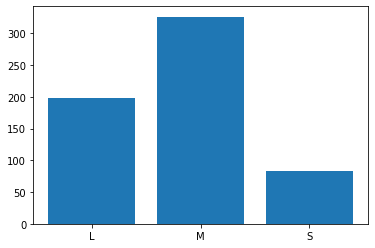

In [19]:
# company size (visualizing using bar chart)
plt.bar(c_s['company_size'], c_s['Count'])
plt.show()

In [20]:
# work year (visualizing using frequency table)
w_y = ds.groupby(['work_year']).size().reset_index(name='Count').rename(columns={'work_year':'work_year'})
w_y

,work_year,Count
0,2020,72
1,2021,217
2,2022,318


2022    318
2021    217
2020     72
Name: work_year, dtype: int64


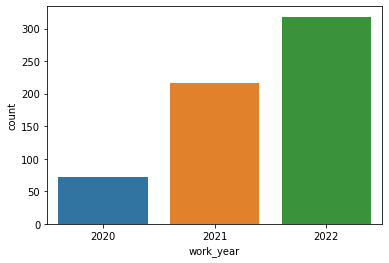

In [21]:
# work year (visualizing using count plot)
sns.countplot(x=ds['work_year'])
print(ds['work_year'].value_counts())

In [22]:
# salary in usd (visualizing using frequency table)
s_u = ds.groupby(['salary_in_usd']).size().reset_index(name='Count').rename(columns={'salary_in_usd':'salary_in_usd'})
s_u

,salary_in_usd,Count
0,2859,1
1,4000,2
2,5409,1
3,5679,1
4,5707,1
...,...,...
364,412000,1
365,416000,1
366,423000,1
367,450000,2


<Axes: >

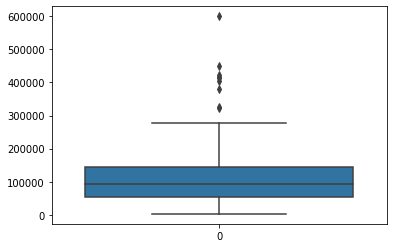

In [23]:
#visualise the salary in USD using boxplot
sns.boxplot(s_u['salary_in_usd'])

In [24]:
# remote ratio (visualizing using frequency table)
r_r = ds.groupby(['remote_ratio']).size().reset_index(name='Count').rename(columns={'remote_ratio':'remote_ratio'})
r_r

,remote_ratio,Count
0,0,127
1,50,99
2,100,381


100    381
0      127
50      99
Name: remote_ratio, dtype: int64


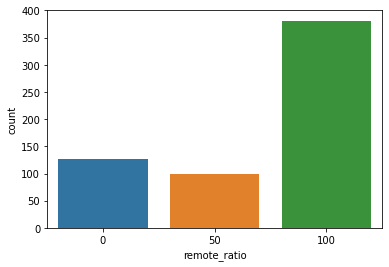

In [25]:
# remote ratio (visualizing using count plot)
sns.countplot(x=ds['remote_ratio'])
print(ds['remote_ratio'].value_counts())

**Bivariate Analysis**

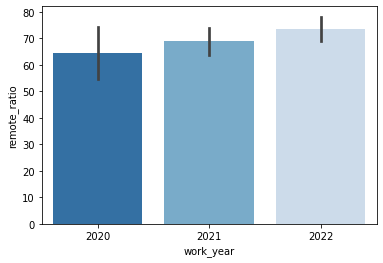

In [26]:
# remote ratio by work year
sns.barplot(data=ds, x='work_year', y='remote_ratio', palette='Blues_r');

In [33]:
# employment type 
ds.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


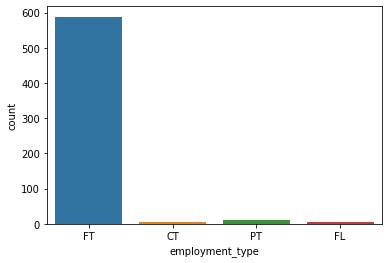

In [68]:
# employment type (visualizing using count plot)
sns.countplot(x=ds['employment_type'])
print(ds['employment_type'].value_counts())

In [34]:
# experience level
ds.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


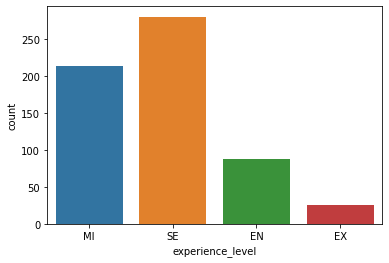

In [69]:
# experience level (visualizing using count plot)
sns.countplot(x=ds['experience_level'])
print(ds['experience_level'].value_counts())

In [35]:
# exployment type by experience level
ds.groupby('experience_level').employment_type.value_counts()

experience_level  employment_type
EN                FT                  79
                  PT                   7
                  CT                   2
EX                FT                  25
                  CT                   1
MI                FT                 206
                  FL                   3
                  PT                   3
                  CT                   1
SE                FT                 278
                  CT                   1
                  FL                   1
Name: employment_type, dtype: int64

In [58]:
# top 3 job title by experience level
tp_3 = ds.groupby('experience_level').job_title.value_counts()
tp_3

experience_level  job_title                               
EN                Data Scientist                              22
                  Data Analyst                                12
                  Data Engineer                               12
                  Machine Learning Engineer                    9
                  Data Science Consultant                      5
                                                              ..
SE                Machine Learning Infrastructure Engineer     1
                  Machine Learning Manager                     1
                  Marketing Data Analyst                       1
                  Principal Data Analyst                       1
                  Staff Data Scientist                         1
Name: job_title, Length: 105, dtype: int64

In [60]:
# company size by experience level
ds.groupby('company_size').experience_level.value_counts()

company_size  experience_level
L             MI                   86
              SE                   72
              EN                   29
              EX                   11
M             SE                  186
              MI                   98
              EN                   30
              EX                   12
S             EN                   29
              MI                   29
              SE                   22
              EX                    3
Name: experience_level, dtype: int64

In [61]:
# company size by experience level
ds.groupby('company_location').experience_level.value_counts()

company_location  experience_level
AE                SE                    2
                  MI                    1
AS                EN                    1
AT                MI                    3
                  SE                    1
                                     ... 
US                SE                  218
                  MI                   90
                  EN                   31
                  EX                   16
VN                EN                    1
Name: experience_level, Length: 93, dtype: int64

**5.1 SALARY BY WORK YEAR**

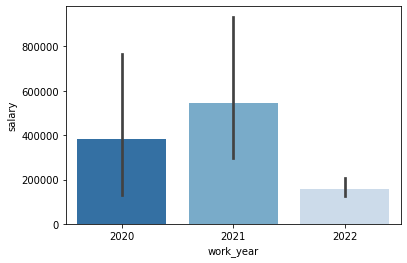

In [62]:
# Salary by work year
sns.barplot(data=ds, x='work_year', y='salary', palette='Blues_r');

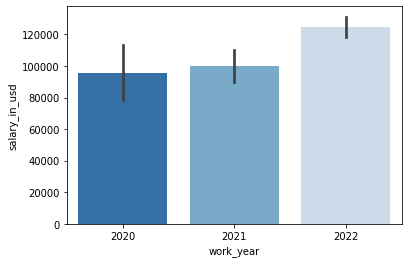

In [65]:
# Salary by work year
sns.barplot(data=ds, x='work_year', y='salary_in_usd', palette='Blues_r');

In [74]:
# salary by experience level
ds.groupby('experience_level').salary.value_counts()

experience_level  salary 
EN                100000     7
                  80000      4
                  20000      3
                  50000      3
                  55000      3
                            ..
SE                1799997    1
                  3000000    1
                  4000000    1
                  4900000    1
                  7000000    1
Name: salary, Length: 357, dtype: int64

**5.1 SALARY BY COMPANY SIZE**

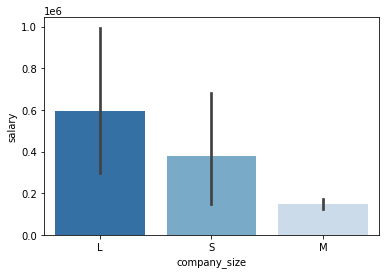

In [75]:
# Salary by Company size
sns.barplot(data=ds, x='company_size', y='salary', palette='Blues_r');

**5.2 SALARY BY EXPERIENCE LEVEL**

In [79]:
# salary by experience level
ds.groupby('experience_level').salary.value_counts()

experience_level  salary 
EN                100000     7
                  80000      4
                  20000      3
                  50000      3
                  55000      3
                            ..
SE                1799997    1
                  3000000    1
                  4000000    1
                  4900000    1
                  7000000    1
Name: salary, Length: 357, dtype: int64

In [80]:
# salary by experience level
ds.groupby(by='experience_level')['salary'].nlargest(1)

experience_level     
EN                16      4450000
EX                384     6000000
MI                177    30400000
SE                285     7000000
Name: salary, dtype: int64

**5.3 SALARY BY COMPANY SIZE**

In [81]:
# salary by company size
ds.groupby('company_size').salary.value_counts()

company_size  salary 
L             120000     6
              150000     6
              200000     6
              60000      4
              70000      4
                        ..
S             1250000    1
              1335000    1
              4450000    1
              7000000    1
              8500000    1
Name: salary, Length: 348, dtype: int64

In [94]:
# salary by company size
ds.groupby(by='company_size')['salary'].nlargest(5)

company_size     
L             177    30400000
              7      11000000
              102    11000000
              285     7000000
              384     6000000
M             222     2500000
              253     2100000
              239     1600000
              458     1400000
              463     1400000
S             137     8500000
              136     7000000
              16      4450000
              244     1335000
              262     1250000
Name: salary, dtype: int64

**5.4 HIGHEST SALARY BY JOB TITLE**

In [101]:
# highest salary by job title
ds.groupby(by="job_title")["salary"].nlargest(2)

job_title                         
3D Computer Vision Researcher  77      400000
AI Scientist                   244    1335000
                               52      300000
Analytics Engineer             560     205300
                               561     184700
                                       ...   
Product Data Analyst           21      450000
                               3        20000
Research Scientist             33      450000
                               106     235000
Staff Data Scientist           283     105000
Name: salary, Length: 89, dtype: int64

**5.5 AVERAGE SALARY BY COMPANY LOCATION**

In [111]:
# average salary by company location
ds.groupby('company_location').salary.mean()

company_location
AE    1.000000e+05
AS    1.335000e+06
AT    6.400000e+04
AU    1.303333e+05
BE    7.250000e+04
BR    6.520000e+04
CA    1.153067e+05
CH    2.750000e+05
CL    3.040000e+07
CN    1.995000e+05
CO    2.184400e+04
CZ    4.949950e+04
DE    7.128996e+04
DK    1.850000e+05
DZ    1.000000e+05
EE    3.000000e+04
ES    4.738286e+04
FR    5.688133e+04
GB    6.229481e+04
GR    4.736364e+04
HN    2.000000e+04
HR    4.000000e+04
HU    1.100000e+07
IE    6.500000e+04
IL    1.600000e+05
IN    2.065208e+06
IQ    1.000000e+05
IR    4.000000e+03
IT    3.110000e+04
JP    3.408667e+06
KE    9.272000e+03
LU    3.833333e+04
MD    1.800000e+04
MT    2.400000e+04
MX    2.793333e+05
MY    4.000000e+04
NG    3.000000e+04
NL    4.910000e+04
NZ    1.250000e+05
PK    1.333333e+04
PL    1.425000e+05
PT    4.210000e+04
RO    6.000000e+04
RU    1.575000e+05
SG    1.200000e+05
SI    5.400000e+04
TR    1.793333e+05
UA    1.340000e+04
US    1.877160e+05
VN    4.000000e+03
Name: salary, dtype: float64